# Modificiaciones del método de Euler

## Ejercicio 1: Implementar método implícito de Euler

El método implícito es:

$$x_{n+1}=x_n+f(x_{n+1},t_{n+1})h,$$

Una forma es utilizar el método de Newton, tomando $g(x)=x_n-f(x,t_n)$, el método nos dice que:

$$\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}.$$

In [1]:
function metodoNewton(f,df,x0,t)   
    x = x0                    
    for i in 1:200                   # Se crea un ciclo for para realizar las iteraciones del método de Newton
        x = x-f(x)/df(x)    
    end
    return x                         # La función arroja el valor de la aproximación de la raíz 
end

metodoNewton (generic function with 1 method)

In [2]:
# Función f para probar nuestro método de Euler implícito
function f(x,t)                       
    return -2.5*x
end

function df(x,t)
    -2.5
end

df (generic function with 1 method)

In [3]:
function Método_implícito_Euler(f,df,t0,tf,h,x0)  # Función Método_implícito_Euler cuyas entradas son la función f, la derivada de la función f, los tiempos inicial y final, el punto inicial x0 y el tamaño de paso h.
    t = linspace(t0,tf,(tf-t0)/h)                 # Creamos un intervalo cuyos extremos son los tiempos inicial y final, que tiene n elementos, considerando n=(tf-t0)/h
    listax=zeros((tf-t0)/h)                       # Creamos un arreglo de n elementos donde se irán guardando las x´s obtenidas con el método.
    x = x0                                        # Condición inicial
    listax[1] = x0
    for i in 2:length(t)                          # Ciclo for para implementar la fórmula de recurrencia mostrada arriba.
        g(x) = x - listax[i-1] - h*f(x,t[i])
        dg(x) = 1 - h*df(x,t[i])
        x = metodoNewton(g,dg,listax[i-1],t[i])   # Utilizando el método de Newton mostrado arriba
        listax[i] = x
    end
    return(t,listax)                              # La función Método_implícito_Euler arroja los valores obtenidos para t y listax.
end

Método_implícito_Euler (generic function with 1 method)

In [4]:
# Esta lista almacenará los resultados obtenidos utilizando la función Método_implícito_Euler, para un tamaño de paso, h=0.01, utilizando la condición inicial x(0)=1.
t10,x10 = Método_implícito_Euler(f,df,0,8,0.01,1);       

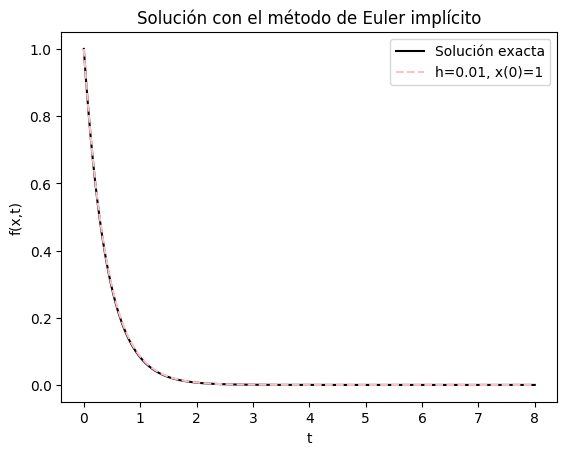

In [5]:
#Graficamos los puntos obtenidos con el método de Euler implícito, considerando h=0.01
using PyPlot
xlabel("t")
ylabel("f(x,t)")
title("Solución con el método de Euler implícito") 
xs = linspace(0,8,1000)    # Intervalo a considerar
ys = map(x -> exp(-2.5*x), xs)
plot(xs,ys,color="black", label = "Solución exacta")  # Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
plot(t10,x10, color="pink", "--", label = "h=0.01, x(0)=1")
legend()
show()

## Ejercicio 2: Implementar Euler. Regla del punto medio.

El método _del punto medio_ o _método de Euler modificado_ es:

$$x_{n+1}=x_n+hf\left(x_n+\frac{h}{2}f(x_n,t_n),t_{n+1/2}\right).$$

In [6]:
function f(x,t)           # Función f para probar la función creada para implementar el método de Euler modificado.
    return -2.5*x
end

f (generic function with 1 method)

In [7]:
function Método_Euler_modificado(f,t0,x0,tf,h)  # Función Método_Euler_modificado cuyas entradas son la función f, los tiempos inicial y final, el punto inicial x0 y el tamaño de paso h.
    t = linspace(t0,tf,(tf-t0)/h)     # Creamos un intervalo cuyos extremos son los tiempos inicial y final, con n elementos, considerando n=(tf-t0)/h
    t1=zeros((tf-t0)/h)               # Creamos un arreglo de n elementos donde se irán guardando los tiempos medios obtenidos.
    x=zeros((tf-t0)/h)                # Creamos un arreglo de n elementos donde se irán guardando las x´s obtenidas con el método de Euler modificado.
    x[1]=x0                           # Condición inicial
    t1[1]=t0                          # El primer elemento del arreglo para los tiempos medios es igual al tiempo inicial.
    for i in 1:length(t)-1            # Ciclo for para implementar la fórmula de recurrencia mostrada arriba.
        t1[i+1]=(t[i+1]+t[i])/2       # Fórmula para calcular los tiempos medios.
        x[i+1] = x[i] + h*f(x[i]+(h/2)*f(x[i],t[i]),t1[i+1])                       
    end
    return(t1,x)                      # La función Método_Euler_modificado arroja los valores obtenidos para t1 y x.
end

Método_Euler_modificado (generic function with 1 method)

In [8]:
th,xh = Método_Euler_modificado(f,0,1,5,0.01);       # Probando nuestro método para t0=0, x0=1, tf=5 y h=0.01.

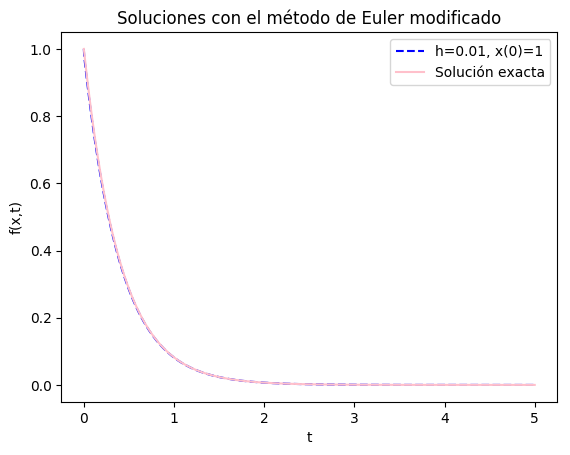

In [9]:
#Graficamos los puntos obtenidos con el método de Euler modificado, considerando h=0.01
using PyPlot
xlabel("t")
ylabel("f(x,t)")
title("Soluciones con el método de Euler modificado") 
plot(th,xh, color="blue", "--", label = "h=0.01, x(0)=1")
legend()
xs = linspace(0,5,10000)    #Intervalo a considerar
ys = map(x -> exp(-2.5*x), xs)
plot(xs,ys,color="pink", label = "Solución exacta")  # Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

## Ejercicio 3. Runge-Kutta


El método se escribe como sigue:
$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
donde:
\begin{align*}
k_1&=f(t_n,x_n),\\
k_2&=f(t_{n+1/2},x_n+\frac{h}{2}k_1),\\
k_3&=f(t_{n+1/2},x_n+\frac{h}{2}k_2),\\
k_4&=f(t_n,x_n+h k_3).\\
\end{align*}


Implementar método de Runge-Kutta de orden 4

In [10]:
function f(t,x)           # Función f para probar la función creada para implementar el método de Euler modificado.
    return -2.5*x
end

f (generic function with 1 method)

In [11]:
function Runge_Kutta(f,t0,tf,h,x0) # Función Runge-Kutta cuyas entradas son la función f, los tiempos inicial y final, el punto inicial x0 y el tamaño de paso h.
x = zeros((tf-t0)/h)               # Creamos un arreglo de n elementos, considerando n=(tf-t0)/h, donde se irán guardando las x´s obtenidas con el método de Runge Kutta.
t = zeros((tf-t0)/h)               # Creamos un arreglo de n elementos donde se irán guardando los tiempos obtenidos.
t[1] = t0                          # Condiciones iniciales
x[1] = x0
    for k in 1:length(t)-1         # Ciclo for para implementar la fórmula de recurrencia mostrada arriba.
        t[k+1] = t[k] + h          # Para calcular los tiempos
        x[k+1]=x[k]+(h/6)*(f(t[k],x[k])+2(f(t[k]+h/2,x[k]+(h/2)*f(t[k],x[k])))+2(f(t[k]+h/2,x[k]+(h/2)*f(t[k]+h/2,x[k]+(h/2)*f(t[k],x[k]))))+(f(t[k],x[k]+h*f(t[k]+h/2,x[k]+(h/2)*f(t[k]+h/2,x[k]+(h/2)*f(t[k],x[k]))))))
    end
    return(t,x)                    # La función Runge-Kutta arroja los valores obtenidos para t1 y x.
end

Runge_Kutta (generic function with 1 method)

In [12]:
t,x = Runge_Kutta(f,0,5,0.01,1);   # Probando nuestro método para t0=0, tf=5, h=0.01 y x0=1.

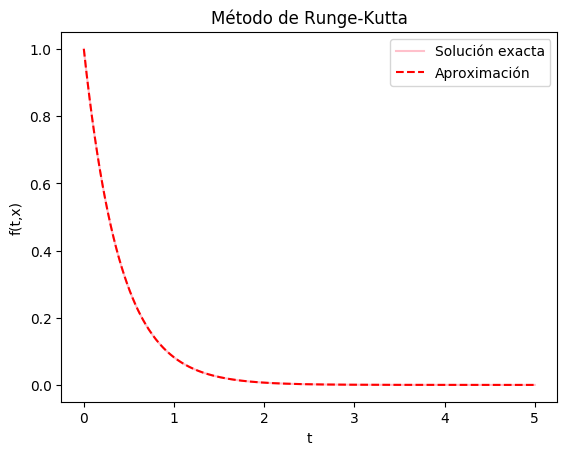

In [13]:
# Graficamos los puntos obtenidos con el método de Runge-Kutta, considerando h=0.01
using PyPlot
xlabel("t")
ylabel("f(t,x)")
title("Método de Runge-Kutta") 
ts = linspace(0,5,10000)         # Intervalo a considerar  
ys = map(x -> exp(-2.5*x), ts)
plot(ts,ys,color="pink", label = "Solución exacta")   # Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
plot(t,x, color = "red", "--", label = "Aproximación")
legend()
show()

## Ejercicio 4
Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

In [14]:
function f(x,t)           #Función f para probar la función creada para implementar el método de Euler
    return -2.5*x
end

f (generic function with 1 method)

In [15]:
#Estas 4 listas almacenarán los resultados obtenidos utilizando la función Método_implícito_Euler, variando el tamaño de paso, para h=1.0,0.5,0.2,0.01 y utilizando la condición inicial x(0)=1.
t1,x1 = Método_implícito_Euler(f,df,0,8,1,1);       
t2,x2 = Método_implícito_Euler(f,df,0,8,0.5,1);
t3,x3 = Método_implícito_Euler(f,df,0,8,0.2,1);
t4,x4 = Método_implícito_Euler(f,df,0,8,0.01,1);

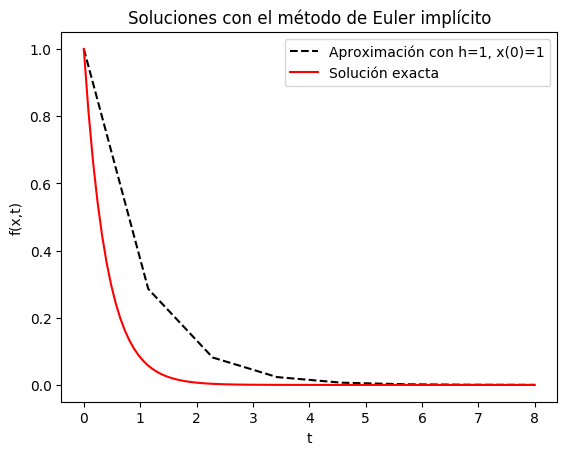

In [16]:
using PyPlot
xlabel("t")
ylabel("f(x,t)")
title("Soluciones con el método de Euler implícito") 
plot(t1,x1, color="black", "--", label = "Aproximación con h=1, x(0)=1" )   #Graficamos los puntos obtenidos con el método de Euler implícito, utilizando un tamaño de paso h=1
legend()
xs = linspace(0,8,100)          #Intervalo a considerar
ys = map(x -> exp(-2.5*x), xs)  
plot(xs,ys,color="red", label = "Solución exacta")         #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, utilizando el método de Euler implícito con un tamaño de paso h=1, se observa que la aproximación si converge a la solución exacta, lo cual no ocurría con el método de Euler explicíto.

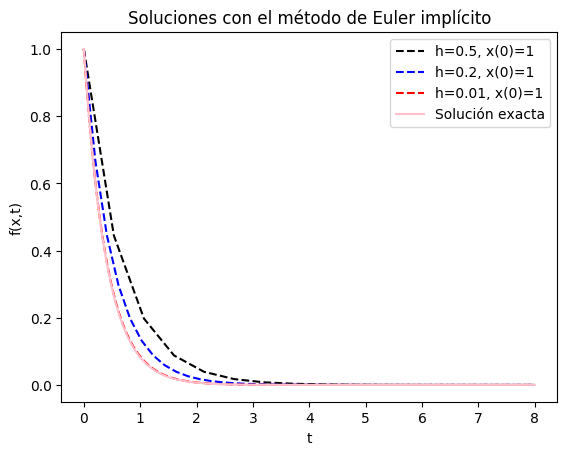

In [17]:
#Graficamos los puntos obtenidos con el método de Euler implícito, considerando h=0.5,0.2 y 0.01.
using PyPlot
xlabel("t")
ylabel("f(x,t)")
title("Soluciones con el método de Euler implícito") 
plot(t2,x2, color="black", "--", label = "h=0.5, x(0)=1")
legend()
plot(t3,x3, color="blue", "--", label = "h=0.2, x(0)=1")
legend()
plot(t4,x4, color="red", "--", label = "h=0.01, x(0)=1")
legend()
xs = linspace(0,8,100)    #Intervalo a considerar
ys = map(x -> exp(-2.5*x), xs)
plot(xs,ys,color="pink", label = "Solución exacta")  #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, a medida que el tamaño de paso disminuye, la aproximación a la solución utilizando el método de Euler se va acercando cada vez más a la solución exacta.

Probando ahora con x(0)=2

In [18]:
#Estas 4 listas almacenarán los resultados obtenidos utilizando la función Método_implícito_Euler, variando el tamaño de paso, para h=1.0,0.5,0.2,0.01 y utilizando la condición inicial x(0)=2.
t5,x5 = Método_implícito_Euler(f,df,0,8,1,2);
t6,x6 = Método_implícito_Euler(f,df,0,8,0.5,2);
t7,x7 = Método_implícito_Euler(f,df,0,8,0.2,2);
t8,x8 = Método_implícito_Euler(f,df,0,8,0.01,2);

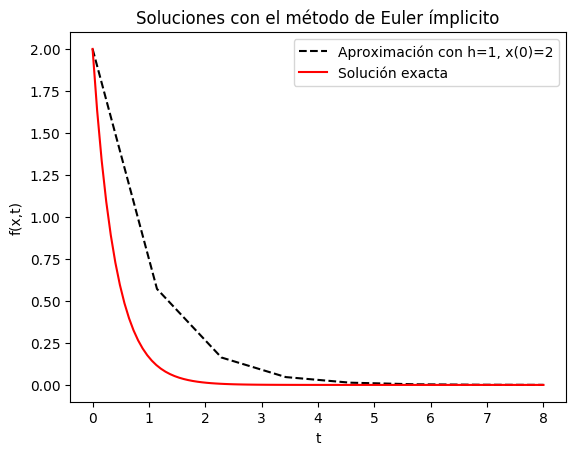

In [19]:
using PyPlot
xlabel("t")
ylabel("f(x,t)")
title("Soluciones con el método de Euler ímplicito") 
plot(t5,x5, color="black", "--", label = "Aproximación con h=1, x(0)=2") #Graficamos los puntos obtenidos con el método de Euler implícito, utilizando un tamaño de paso h=1
legend()
xs = linspace(0,8,100)    #Intervalo a considerar
ys = map(x -> 2*exp(-2.5*x), xs)
plot(xs,ys,color="red", label = "Solución exacta")   #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, utilizando el método de Euler implícito con un tamaño de paso h=1, se observa que la aproximación si converge a la solución exacta, lo cual no ocurría con el método de Euler explicíto.

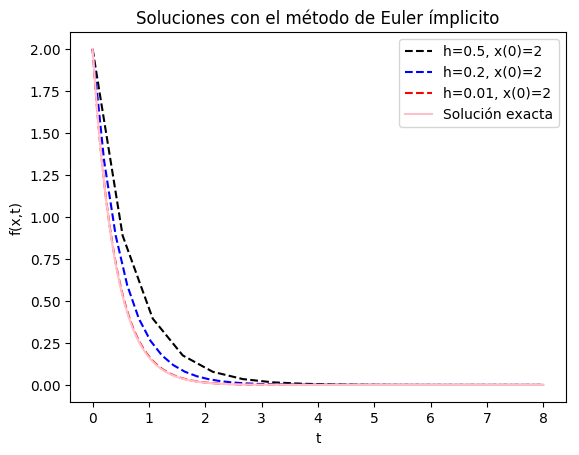

In [20]:
# Graficamos los puntos obtenidos con el método de Euler implícito, considerando h=0.5,0.2 y 0.01.
using PyPlot
xlabel("t")
ylabel("f(x,t)")
title("Soluciones con el método de Euler ímplicito") 
plot(t6,x6, color="black", "--", label = "h=0.5, x(0)=2")
legend()
plot(t7,x7, color="blue", "--", label = "h=0.2, x(0)=2")
legend()
plot(t8,x8, color="red", "--", label = "h=0.01, x(0)=2")
legend()
xs = linspace(0,8,100)    #Intervalo a considerar
ys = map(x -> 2*exp(-2.5*x), xs)
plot(xs,ys,color="pink", label = "Solución exacta")  #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Como se observa en la gráfica, a medida que el tamaño de paso disminuye, la aproximación a la solución utilizando el método de Euler se va acercando cada vez más a la solución exacta.

## Ejercicio 5
Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:

$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$

Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

Utilizando el método de punto medio.

In [21]:
function g(x,t)    # Ecuación de la que se busca extraer la solución
    (2x-18t)/(1+t)
end

g (generic function with 1 method)

In [22]:
# Estas 2 listas almacenarán los resultados obtenidos utilizando la función Método_Euler_modificado, variando el tamaño de paso, para h=0.1,0.5 y utilizando la condición inicial x(0)=4.
t10,x10 = Método_Euler_modificado(g,0,4,3,0.01); 

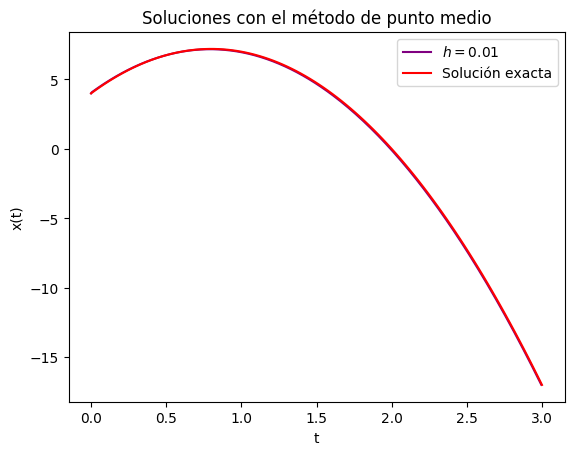

In [23]:
#Graficamos los puntos obtenidos con el método de Euler modificado, considerando h=0.1,0.5
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Solución con el método de punto medio") 
plot(t10,x10, color="purple", label = L"h=0.01")
legend()
xs = linspace(0,3,100)    #Intervalo a considerar
ys = map(t -> 4+8*t-(5*t^2), xs)
plot(xs,ys,color="red", label = "Solución exacta")  #Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

Utilizando el método de Runge-Kutta.

In [24]:
function g(t,x)    # Ecuación de la que se busca extraer la solución
    (2x-18t)/(1+t)
end

g (generic function with 1 method)

In [25]:
# Estas 2 listas almacenarán los resultados obtenidos utilizando la función Runge_Kutta, variando el tamaño de paso, para h=0.1,0.05 y utilizando la condición inicial x(0)=4.
t12,x12 = Runge_Kutta(g,0,3,0.01,4);

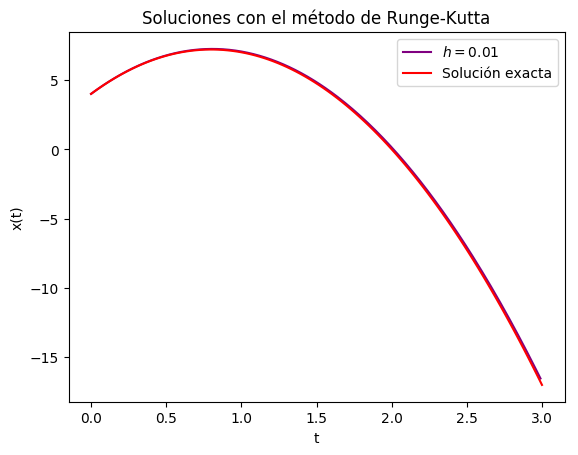

In [26]:
#Graficamos los puntos obtenidos con el método de Método de Runge-Kutta, considerando h=0.1,0.05
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Solución con el método de Runge-Kutta") 
plot(t12,x12, color="purple", label = L"h=0.01")
legend()
xs = linspace(0,3,100)    # Intervalo a considerar
ys = map(t -> 4+8*t-(5*t^2), xs)
plot(xs,ys,color="red", label = "Solución exacta")  # Graficamos la solución exacta de la ecuación en el intervalo mencionado
legend()
show()

## Ejercicio 6
Grafique la energía total del oscilador armónico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

__Nota:__ Deberán hacer una implementación de Runge-Kutta para dos dimensiones (o de una vez más si quieren, basandose en el ejemplo que les di, si se les ocurre una mánera mejor, adelante).

In [27]:
# Podemos utilizar la función vista en clase para el método de Euler independiente de las dimensiones del sistema.
function metodo_euler(f,list,x0)    # Función metodo_euler cuyas entradas son la función f, list que es el intervalo de tiempo y el punto inicial x0.
    x = x0                          # Condición inicial
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                      # Arreglo vacío que guardará los resultados obtenidos con este método.
    push!(listx,x)                  # Agregamos al arreglo listx, el punto inicial con push
    for i in 2:length(list)         # Ciclo for que implementará la fórmula de recurrencia mostrada arriba para el método de Euler 
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x)              # Para cada vuelta del ciclo, se agrega el resultado obtenido al arreglo listx 
    end
    return listx                    # La función metodo_euler regresa listx
end

metodo_euler (generic function with 1 method)

In [28]:
f(x,t) = [x[2], -x[1]]     # Función de 2 dimensiones (v, -kx), considerando k=1
list = 0:0.1:10;           # Intervalo de tiempo a considerar
vec = metodo_euler(f,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones x(0)=1 y v(0)=0 
listx1 = map(x->x[1],vec);          # Posición 
listx2 = map(x->x[2],vec);          # Velocidad

In [29]:
# Las siguientes funciones permitirán calcular las energías potencial y cinética a partir de los arreglos obtenidos para la posición y la velocidad del oscilador armónico.

function energía_potencial(k,lista_x)    
    U = (1/2)*k*lista_x.^2
    return U
end 

function energía_cinética(m,lista_v)
    K = (1/2)*m*lista_v.^2
    return K
end 

energía_cinética (generic function with 1 method)

In [30]:
# Las listas U1 Y K1 almacenarán los valores obtenidos para las energías potencial y cinética, respectivamente, mientras que las listas U1t y K1t almacenarán los resultados obtenidos de formateórica, considerando m=k=1. 
U1 = energía_potencial(1,listx1);
K1 = energía_cinética(1,listx2);
ET1=U1+K1;    # La energía total es la suma de las energías cinética y potencial.

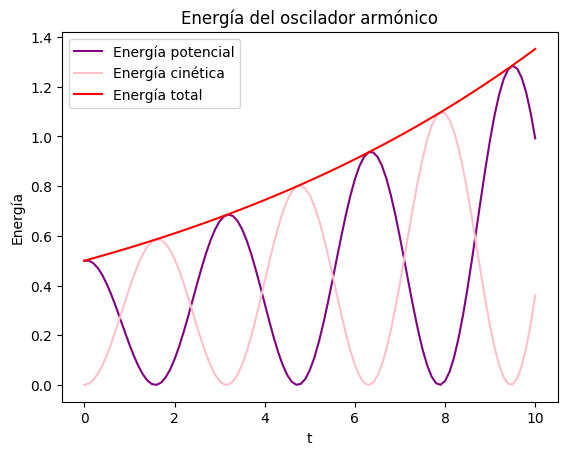

In [31]:
using PyPlot
xlabel("t")
ylabel("Energía")
title("Energía del oscilador armónico") 
plot(list,U1, color ="purple", label = "Energía potencial")     # Graficando las soluciones obtenidas para las energías potencial y cinética del oscilador armónico.  
legend()
plot(list,K1, color ="pink", label = "Energía cinética");
legend()
plot(list,ET1, color ="red", label = "Energía total");
legend()
show()

Utilizando el método de Euler explícito, se observa que conforme el tiempo aumenta, la energía se dispara, por lo que no se observa la conservación de la energía.

Utilizando Runge-Kutta de 4 orden.

In [32]:
# Podemos adaptar la función mostrada arriba para Euler independiente de las dimensiones del sistema, en este caso para el método de Runge-Kutta.
function metodo_Runge_Kutta(f,list,x0)    # Función metodo_Runge_Kutta cuyas entradas son la función f, list que es el intervalo de tiempo y el punto inicial x0.
    x = x0                          # Condición inicial
    h = list[2]-list[1]             # El tamaño de paso h se obtiene de restar los primeros 2 elementos de la lista.
    listx = []                      # Arreglo vacío que guardará los resultados obtenidos con este método.
    push!(listx,x)                  # Agregamos al arreglo listx, el punto inicial con push
    for i in 2:length(list)         # Ciclo for que implementará la fórmula de recurrencia mostrada arriba para el método de Runge-Kutta 
        t = i*h
        x = x+(h/6)*(f(t,x)+2(f(t+h/2,x+(h/2)*f(t,x)))+2(f(t+h/2,x+(h/2)*f(t+h/2,x+(h/2)*f(t,x))))+(f(t,x+h*f(t+h/2,x+(h/2)*f(t+h/2,x+(h/2)*f(t,x))))))
        push!(listx,x)              # Para cada vuelta del ciclo, se agrega el resultado obtenido al arreglo listx 
    end
    return listx                    # La función metodo_euler regresa listx
end

metodo_Runge_Kutta (generic function with 1 method)

In [33]:
f(t,x) = [x[2], -x[1]]     # Función de 2 dimensiones (v, -kx), considerando k=1
list = 0:0.1:10;           # Intervalo de tiempo a considerar
vec = metodo_Runge_Kutta(f,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones x(0)=1 y v(0)=0 
listx3 = map(x->x[1],vec);          # Posición 
listx4 = map(x->x[2],vec);          # Velocidad

In [34]:
# Las listas U2 Y K2 almacenarán los valores obtenidos para las energías potencial y cinética, respectivamente, mientras que las listas U2t y K2t almacenarán los resultados obtenidos de formateórica, considerando m=k=1. 
U2 = energía_potencial(1,listx3);
K2 = energía_cinética(1,listx4);
ET2 = U2+K2;   # La energía total es la suma de las energías cinética y potencial.

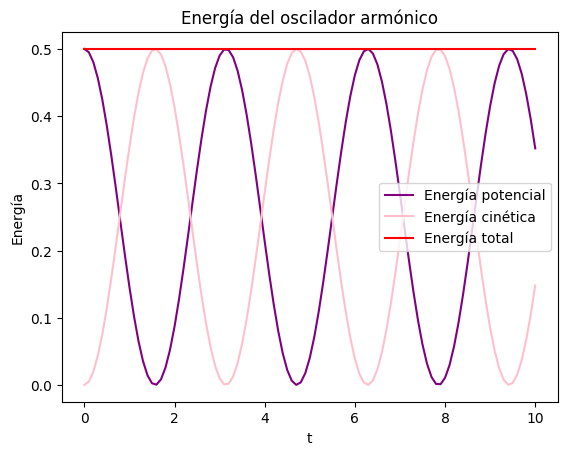

In [35]:
using PyPlot
xlabel("t")
ylabel("Energía")
title("Energía del oscilador armónico") 
plot(list,U2, color ="purple", label = "Energía potencial") # Graficando las soluciones obtenidas para las energías potencial y cinética del oscilador armónico.  
legend()
plot(list,K2, color ="pink", label = "Energía cinética");
legend()
plot(list,ET2, color ="red", label = "Energía total");
legend()
show()

Utilizando el método de Runge-Kutta, se observa que la energía total se conserva.

## Ejercicio 7
Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaría graficar $(x,p)$. Nota: Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos listx y listv, bastará con hacer plot(listx,listv).

Utilizando el método explícito de Euler

In [36]:
# Utilizando el método de Euler explícito con h=0.01, se obtienen las listas listx1 y listx2, que almacenarán la posición y velocidad del oscilador armónico, respectivamente.
f(x,t) = [x[2], -x[1]]      # Función de 2 dimensiones (v, -kx), considerando k=1
list = 0:0.01:10;           # Intervalo de tiempo a considerar
vec = metodo_euler(f,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones x(0)=1 y v(0)=0 
listx1 = map(x->x[1],vec);          # Posición 
listx2 = map(x->x[2],vec);          # Velocidad

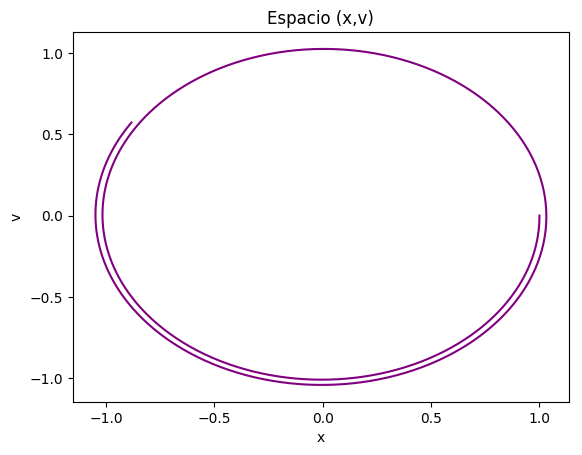

In [37]:
using PyPlot
xlabel("x")
ylabel("v")
title("Espacio (x,v)") 
plot(listx1,listx2, color ="purple")  # Graficando x vs. v 
show()

Utilizando el método de Runge-Kutta

In [38]:
# Utilizando el método de Runge-Kutta, con h=0.01, se obtienen las listas listx3 y listx4, que almacenarán la posición y velocidad del oscilador armónico, respectivamente.
f(t,x) = [x[2], -x[1]]     # Función de 2 dimensiones (v, -kx), considerando k=1
list = 0:0.01:10;          # Intervalo de tiempo a considerar
vec = metodo_Runge_Kutta(f,list,[1,0]);   # El vector vec contiene la solución de nuestro sistema con las condiciones x(0)=1 y v(0)=0 
listx3 = map(x->x[1],vec);          # Posición 
listx4 = map(x->x[2],vec);          # Velocidad

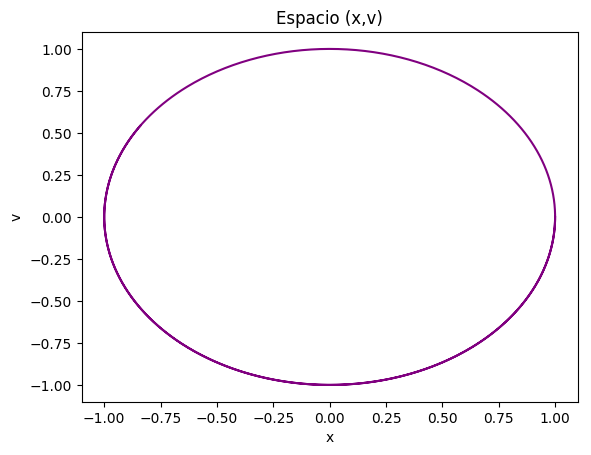

In [39]:
using PyPlot
xlabel("x")
ylabel("v")
title("Espacio (x,v)") 
plot(listx3,listx4, color ="purple")                   # Graficando x vs. v. 
show()

## Ejercicio 8
Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

Como p=mv, considerando m=1, se tiene que p=v.

In [40]:
# Función de 2 dimensiones (v, -kx), considerando k=1
f(t,x) = [x[2], -x[1]]     
list = 0:0.1:10;           # Intervalo de tiempo a considerar

# Los vectores vec contiene la solución de nuestro sistema con las condiciones iniciales propuestas para cada caso.

vec1 = metodo_Runge_Kutta(f,list,[1,0]);   # x(0)=1 y v(0)=0 
listX1 = map(x->x[1],vec1);                # Posición 
listV1 = map(x->x[2],vec1);                # Velocidad

vec2 = metodo_Runge_Kutta(f,list,[1,4]);   # x(0)=1 y v(0)=4 
listX2 = map(x->x[1],vec2);                # Posición 
listV2 = map(x->x[2],vec2);                # Velocidad
 
vec3 = metodo_Runge_Kutta(f,list,[1,3]);   # x(0)=1 y v(0)=3 
listX3 = map(x->x[1],vec3);                # Posición 
listV3 = map(x->x[2],vec3);                # Velocidad

vec4 = metodo_Runge_Kutta(f,list,[2,1]);   # x(0)=2 y v(0)=1 
listX4 = map(x->x[1],vec4);                # Posición 
listV4 = map(x->x[2],vec4);                # Velocidad

vec5 = metodo_Runge_Kutta(f,list,[5,1]);   # x(0)=5 y v(0)=1 
listX5 = map(x->x[1],vec5);                # Posición 
listV5 = map(x->x[2],vec5);                # Velocidad

vec6 = metodo_Runge_Kutta(f,list,[7,2]);   # x(0)=10 y v(0)=1 
listX6 = map(x->x[1],vec6);                # Posición 
listV6 = map(x->x[2],vec6);                # Velocidad

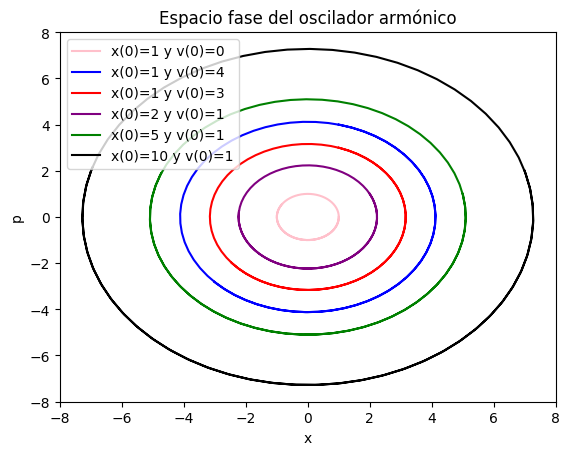

In [41]:
using PyPlot          # Graficando el espacio fase para las distintas condiciones iniciales.
xlabel("x")
ylabel("p")
title("Espacio fase del oscilador armónico") 
plot(listX1,listV1, color ="pink", label = "x(0)=1 y v(0)=0");
legend()
plot(listX2,listV2, color ="blue", label = "x(0)=1 y v(0)=4");
legend()
plot(listX3,listV3, color ="red", label = "x(0)=1 y v(0)=3");
legend()
plot(listX4,listV4, color ="purple", label = "x(0)=2 y v(0)=1");
legend()
plot(listX5,listV5, color ="green", label = "x(0)=5 y v(0)=1");
legend()
plot(listX6,listV6, color ="black", label = "x(0)=10 y v(0)=1");
legend()
show()

Como se observa en el espacio fase del oscilador armónico, las curvas obtenidas son elipses, que varían dependiendo de las condiciones iniciales utilizadas.